In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path

In [2]:
pheno_total = pd.read_csv('data/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', sep = '\t', index_col = 'TargetID')
target_pheno_total = pheno_total.loc['ENSG00000167074.9']

b_hat_eur_total = pd.read_csv('data/EUR373.gene.cis.FDR5.all.rs137.txt', sep = '\t')
b_hat_eur_total_grouped = dict(list(b_hat_eur_total.groupby('GENE_ID')))
b_hat_eur_target = b_hat_eur_total_grouped['ENSG00000167074.9']

eur_sample = pd.read_csv('data/clean/eur_genotype.012.indv', sep = '\t', header = None)
afr_sample = pd.read_csv('data/clean/afr_genotype.012.indv', sep = '\t',header = None)

target_pheno_eur = pd.merge(target_pheno_total, eur_sample, left_index = True, right_on = 0)
target_pheno_afr = pd.merge(target_pheno_total, afr_sample, left_index = True, right_on = 0)

eur_genotype = pd.read_csv('data/clean/eur_genotype.012', sep = '\t', header = None, index_col = 0)
afr_genotype = pd.read_csv('data/clean/afr_genotype.012', sep = '\t', header = None, index_col = 0)

pa = target_pheno_afr.set_index(0)
pe = target_pheno_eur.set_index(0)

sorted_eur_pheno = pd.merge(eur_sample, pe, left_on = 0 , right_index = True, how = 'left')
sorted_afr_pheno = pd.merge(afr_sample, pa, left_on = 0 , right_index = True, how = 'left')
sorted_b_hat_eur = b_hat_eur_target.sort_values(by = 'SNPpos')

X1o = eur_genotype
X2o = afr_genotype
b1_hat = sorted_b_hat_eur['rvalue']
y1o = sorted_eur_pheno['ENSG00000167074.9']
y2o = sorted_afr_pheno['ENSG00000167074.9']
R1 = X1o.cov()

In [15]:
# least squares for marginal effect sizes
X1o = np.array(X1o,dtype = np.float64,order = 'C')
X2o = np.array(X2o,dtype = np.float64,order = 'C')
y1o = np.array(y1o,dtype = np.float64,order = 'C')
y2o = np.array(y2o,dtype = np.float64,order = 'C')

b1_hat = []
count3 = 0
for x1 in X1o.T:
    count3+=1
    x1 = np.vstack([x1, np.ones(len(x1))]).T
    b_hat, intercept = np.linalg.lstsq(x1,y1o)[0]
    b1_hat.append(b_hat)
print(count3)
b1_hat = np.array(b1_hat, dtype = np.float64, order = 'C')
print(b1_hat.shape)

869
(869,)


<ipython-input-15-526f9147c265>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_hat, intercept = np.linalg.lstsq(x1,y1o)[0]


(array([ 4., 17., 45., 39.,  5., 26.,  6.,  8., 16., 29., 19., 22.,  8.,
         5.,  8.,  4.,  7.,  3.,  1.,  4.,  0.,  3.,  1.,  4.,  1.,  1.,
         1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,
         2.,  1.,  1.,  2.,  8.,  5.,  4.,  2., 21.,  4.,  3.,  4.,  4.,
         3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  1.,  0.,  2.,  2., 10.,  3.,  6., 16.,  6.,
         1.,  9.,  3., 14.,  2.,  6.,  3.,  7., 24.,  7., 10., 15.,  8.,
         3.,  2.,  4., 10.,  7., 11., 12., 10.,  2.,  7.,  5.,  1.,  3.,
         1.,  2.,  1.,  8.,  0.,  8.,  8.,  8.,  5.

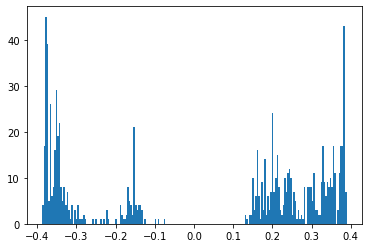

In [18]:
plt.hist(b1_hat, bins = 200)

In [19]:
X1 = (X1o-X1o.mean())
X2 = (X2o-X2o.mean())
y1 = (y1o-y1o.mean())
y2 = (y2o-y2o.mean())
N1 = 373
N2 = 89

1.0

In [21]:
for idx1,x1 in enumerate(np.std(X1o, axis = 0)): # pandas DataFrame.std() is based on column, numpy ndarray.std() is simply computed for the flattened array, you have to use np.std(x,axis = 1) to set column-based mode.
    if x1==0:
        print(idx1)
idx_valid = []
count = 0
for idx2,x2 in enumerate(np.std(X2o, axis = 0)):
    if x2==0:
        count +=1
    else:
        idx_valid.append(idx2)
        #print(idx2)
print(count)
print(idx_valid)

133
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 221, 222, 223, 225, 227, 228, 230

In [22]:
X1 = np.array(X1,dtype = np.float64,order = 'C')
X1o = np.array(X1o,dtype = np.float64,order = 'C')
X2 = np.array(X2,dtype = np.float64,order = 'C')
X2o = np.array(X2o,dtype = np.float64,order = 'C')
b1_hat = np.array(b1_hat, dtype = np.float64,order = 'C')
y1 = np.array(y1, dtype = np.float64, order = 'C')
y1o = np.array(y1o,dtype = np.float64,order = 'C')
y2 = np.array(y2, dtype = np.float64, order = 'C')
y2o = np.array(y2o,dtype = np.float64,order = 'C')
R1 = np.array(R1,dtype = np.float64, order = 'C')

In [23]:
X1 = X1[:,idx_valid]
X2 = X2[:,idx_valid]
X1o = X1o[:,idx_valid]
X2o = X2o[:,idx_valid]
b1_valid = b1_hat[idx_valid]

In [24]:
b1_std = np.std(X1o, axis = 0) * b1_valid / y1o.std()

In [25]:
X1 = X1/np.std(X1o, axis = 0)
X2 = X2/np.std(X2o, axis = 0)
y1 = y1/y1o.std()
y2 = y2/y2o.std()
R1 = np.cov(X1.T)
D_R1 = np.diag(np.diag(R1))

In [26]:
 np.std(X1o, axis = 0)[0] * b1_valid[0] / y1o.std()

0.28084493125978366

In [27]:
A1 = X1.T @ X1
A1_t = (N1-1)*R1
b1_t = (N1-1) * (D_R1 @ b1_std)
b1 = X1.T @ y1
print(b1[0:5])
print(b1_t[0:5])

[104.75515936 104.36093673  98.96388122 104.36093673 104.36093673]
[104.75515936 104.36093673  98.96388122 104.36093673 104.36093673]
